In [ ]:
#
# hw7pr2:  digit clasification via nearest neighbors
#

In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [2]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits4.csv'
df = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read!")

digits4.csv : file read!


In [3]:
df

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,digit_label
0,0,0,1,9,15,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown
1,0,0,3,13,11,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown
2,0,0,10,14,11,3,0,0,0,4,...,0,0,0,0,0,0,0,0,0,unknown
3,0,0,0,0,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown
4,0,0,3,12,16,16,6,0,0,0,...,0,0,0,0,0,0,0,0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,digit9
1794,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,digit0
1795,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,digit8
1796,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,digit9


In [4]:
#
# let's convert our data to a numpy array, named A
#
A = df.values
print(A)

[[0 0 1 ... 0 0 'unknown']
 [0 0 3 ... 0 0 'unknown']
 [0 0 10 ... 0 0 'unknown']
 ...
 [0 0 1 ... 0 0 'digit8']
 [0 0 2 ... 0 0 'digit9']
 [0 0 10 ... 1 0 'digit8']]


In [5]:
# column order is captured in these two "Python dictionaries":

COLS = {              # also: FEATURES
    "pix0":0,
    "pix1":1,
    "pix2":2,
    "pix3":3,
    "pix4":4,         # should use this horizontal space more effectively!
    "pix5":5,
    "pix6":6,
    "pix7":7,
    "pix8":8,
    "pix9":9,
    "pix10":10,
    "pix11":11,
    "pix12":12,
    "pix13":13,
    "pix14":14,
    "pix15":15,
    "pix16":16,
    "pix17":17,
    "pix18":18,
    "pix19":19,
    "pix20":20,
    "pix21":21,
    "pix22":22,
    "pix23":23,
    "pix24":24,
    "pix25":25,
    "pix26":26,
    "pix27":27,
    "pix28":28,
    "pix29":29,
    "pix30":30,
    "pix31":31,
    "pix32":32,
    "pix33":33,
    "pix34":34,
    "pix35":35,
    "pix36":36,
    "pix37":37,
    "pix38":38,
    "pix39":39,
    "pix40":40,
    "pix41":41,
    "pix42":42,
    "pix43":43,
    "pix44":44,
    "pix45":45,
    "pix46":46,
    "pix47":47,
    "pix48":48,
    "pix49":49,
    "pix50":50,
    "pix51":51,
    "pix52":52,
    "pix53":53,
    "pix54":54,
    "pix55":55,
    "pix56":56,
    "pix57":57,
    "pix58":58,
    "pix59":59,
    "pix60":60,
    "pix61":61,
    "pix62":62,
    "pix63":63,
    "digit_label":64
}
# test this
print("Test COLS:  COLS['pix42'] is", COLS['pix42'])

# reverse the key/value ordering
COL_NAMES = {}
for key in COLS:
    value = COLS[key]
    COL_NAMES[value] = key # reversed!

print()   # let's test the reversed dictionary...
print("Test COL_NAMES:   COL_NAMES[42] is", COL_NAMES[42])

Test COLS:  COLS['pix42'] is 42

Test COL_NAMES:   COL_NAMES[42] is pix42


In [6]:
# let's use the dictionary!
the_digit = A[901]  # digit at index 901
print("the_digit is", the_digit)
print()
print("Its pix5 is ", the_digit[COLS['pix5']])
print()
print("Simpler to type: ", the_digit[5])

the_digit is [0 0 0 4 15 6 0 0 0 0 0 13 13 1 0 0 0 0 7 16 2 0 0 0 0 4 15 8 0 5 0 0 0 11
 14 1 6 16 5 0 1 16 14 12 16 16 3 0 0 10 12 10 16 10 0 0 0 0 0 6 16 2 0 0
 'digit4']

Its pix5 is  6

Simpler to type:  6


In [7]:
# all of the scikit-learn ML routines need numbers, not strings
#
# we will convert digit-species to numbers - first, defining these dictionaries:

SPECIES_NUMS = {
    'digit0':0,
    'digit1':1,
    'digit2':2,
    'digit3':3,
    'digit4':4,
    'digit5':5,
    'digit6':6,
    'digit7':7,
    'digit8':8,
    'digit9':9,
    'unknown':-1,   
}
# test this
print("Test SPECIES_NUMS:  SPECIES_NUMS['digit3'] is", SPECIES_NUMS['digit3'])

NUM_TO_SPECIES = {
    0:'digit0',
    1:'digit1',
    2:'digit2',
    3:'digit3',
    4:'digit4',
    5:'digit5',
    6:'digit6',
    7:'digit7',
    8:'digit8',
    9:'digit9',
    -1:'unknown',    # Note: they don't need to be in order!
}
print()
print("Test NUM_TO_SPECIES:   NUM_TO_SPECIES[0] is", NUM_TO_SPECIES[0])

Test SPECIES_NUMS:  SPECIES_NUMS['digit3'] is 3

Test NUM_TO_SPECIES:   NUM_TO_SPECIES[0] is digit0


In [8]:
#
# let's loop through the data (A) and convert the species to numbers
#

NUM_ROWS, NUM_COLS = A.shape

for r in range(NUM_ROWS):
    species = A[r][64]                     # or A[r][  COLS['digit_label']  ]
    if type(species) != type('str'): continue   # not a string, keep looping!
        
    species_number = SPECIES_NUMS[species]
    A[r][64] = species_number      # convert to species
    print(A[r][64], end=" ")
    
#
# make sure everything is a floating-point value!
#

A = A.astype('float64')  # float64 is the most usual floating-point value...
print("A is an array of type", A.dtype, "and shape", A.shape)
#print(A)

-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 7 7 3 5 1 0 0 2 2 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 5 6 7 8 9 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 3 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 

In [9]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print("X_all is", X_all)
print("y_all is", y_all)

+++ Start of data definitions +++

X_all is [[ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y_all is [-1. -1. -1. ...  8.  9.  8.]


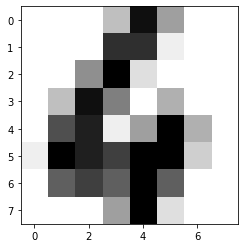

That image has the label: 4


In [12]:
#
# showing a digit as an image (the challenge is digit-recognition, after all!)...
#

from matplotlib import pyplot as plt
import matplotlib.cm as cm

def show_digit( Pixels ):
    """ input Pixels should be an np.array of 64 integers (valued between 0 to 15) 
        there's no return value, but this should show an image of that 
        digit in an 8x8 pixel square
    """
    # print(Pixels.shape)
    Patch = Pixels.reshape((8,8))  # make it an 8x8 image
    plt.figure(1, figsize=(4,4))   # make our figure!
    plt.imshow(Patch, cmap=plt.cm.gray_r, interpolation='nearest')  # plt.cm.gray_r   # plt.cm.hot
    plt.show()  # show our figure...
    
# try it out:
if True:
    row = 901  # Which row?
    # the csv's row # will be different by 2  (the csv's is larger: for the header + 1-indexing)
    Pixels = X_all[row:row+1,:]
    show_digit(Pixels)
    label = int(y_all[row])
    print("That image has the label:", label)

In [ ]:
#
# the remainder of the workflow is for you to build!
#
#   [1] copy-and-paste is your friend!   HOWEVER,
#
#   [2] here, our goal is to understand what each cell is doing (by trying it out!!)
#

In [ ]:
#
# break our dataset into distinct pieces:   unknown vs labeled
#

In [13]:
#
# break our dataset into distinct pieces:   unknown vs labeled
#

NUM_UNKNOWN = 22

X_unknown = X_all[:NUM_UNKNOWN,:]  # unknown up to here...
y_unknown = y_all[:NUM_UNKNOWN]    # unknown up to here...

# known data w/ labels
X_labeled_orig = X_all[NUM_UNKNOWN:,:]  # labeled data starts at this index
y_labeled_orig = y_all[NUM_UNKNOWN:]    # labeled data starts at this index

#
# we scramble the data - but _only_ the labeled data!
# 
indices = np.random.permutation(len(y_labeled_orig))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_labeled_orig[indices]              # we must apply the _same_ permutation to each!
y_labeled = y_labeled_orig[indices]              # again...

In [25]:
#
# we can re-weight different features here...
#

COL_WEIGHT = {              # also: FEATURE_WEIGHT  compare:  COLS
    'pix32':1.0,
    'pix33':1.0
    #key    #value
}

for col_name in COL_WEIGHT:
    i = COLS[col_name]    # get the column index, i, of the col_name
    weight = COL_WEIGHT[col_name]
    print("Weighting", col_name, "by", weight)   # weighting == "multiplying"
    
    X_labeled[:,i] *= weight      # multiply by the weight to give this column ("feature")


Weighting pix32 by 1.0
Weighting pix33 by 1.0


In [ ]:
# and so on... !

In [26]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ train on the testing data.
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# most common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

X_test = X_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print("testing with", TEST_SIZE, "rows; training with", (NUM_ROWS-TEST_SIZE), "rows")

testing with 355 rows; training with 1421 rows


In [27]:
# +++ This is the "Model-building and -training Cell"
#       
# Create a kNN model and train it! 

from sklearn.neighbors import KNeighborsClassifier

k = 71   # we don't know what k to use, so we guess!  (71 will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)   # here, k is the "k" in kNN

# we train the model (one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  


Created and trained a knn classifier with k = 71


In [28]:
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)

# Now, run our test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)


Predicted labels: [8. 7. 2. 7. 0. 7. 5. 0. 6. 5. 2. 3. 0. 9. 6. 0. 9. 7. 3. 5. 4. 8. 3. 9.
 1. 6. 5. 3. 1. 0. 0. 6. 0. 8. 2. 5. 2. 2. 1. 8. 6. 0. 8. 8. 1. 2. 7. 9.
 8. 8. 4. 4. 1. 4. 0. 7. 4. 0. 5. 0. 5. 6. 7. 7. 0. 6. 2. 8. 1. 5. 4. 0.
 7. 6. 2. 0. 2. 2. 4. 9. 5. 0. 2. 3. 0. 3. 4. 0. 5. 9. 2. 4. 5. 9. 1. 3.
 5. 2. 0. 2. 5. 1. 7. 5. 1. 2. 3. 5. 9. 2. 5. 1. 0. 3. 3. 5. 0. 0. 7. 5.
 6. 8. 8. 0. 0. 1. 0. 0. 8. 1. 4. 6. 0. 9. 3. 2. 2. 7. 0. 5. 9. 2. 7. 8.
 0. 3. 3. 0. 3. 5. 5. 0. 8. 5. 4. 5. 5. 6. 8. 0. 0. 0. 8. 5. 3. 1. 4. 0.
 4. 5. 6. 4. 5. 2. 9. 3. 6. 5. 0. 0. 3. 3. 0. 9. 3. 1. 2. 1. 9. 0. 0. 3.
 9. 9. 5. 3. 7. 5. 4. 5. 2. 3. 2. 0. 9. 9. 7. 2. 7. 3. 7. 8. 5. 3. 3. 4.
 8. 4. 2. 3. 1. 6. 4. 0. 3. 1. 7. 0. 6. 5. 3. 7. 3. 0. 7. 7. 7. 5. 1. 5.
 0. 3. 0. 6. 5. 7. 5. 0. 5. 0. 3. 8. 7. 5. 5. 4. 9. 3. 7. 2. 5. 5. 5. 0.
 4. 4. 9. 0. 4. 3. 9. 8. 6. 2. 5. 7. 0. 2. 8. 5. 0. 3. 3. 9. 8. 7. 5. 1.
 7. 4. 2. 9. 3. 5. 1. 0. 3. 1. 6. 8. 7. 5. 8. 0. 3. 0. 0. 5. 0. 4. 7. 0.
 7. 6. 4. 0. 0. 0. 0. 5. 0. 4. 7.

In [31]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a nicer comparison, including counting how many are correct """
    NUM_LABELS = predicted_labels.shape[0]
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = predicted_labels[i]
        a = actual_labels[i]
        p_label = NUM_TO_SPECIES[p]
        a_label = NUM_TO_SPECIES[a]
        if p == a:
            toshow = ""
            num_correct += 1
        else:
            toshow = "incorrect"
            
        print(f"row {i}    |  {p}  {a}  |   {p_label} {a_label}   {toshow}")   # cool! "f-string" printing
        
        # even spiffier "formatted printing"  (cool stuff!)  
        #print(f"row {i:2d}    |  {p:1.0f}  {a:1.0f}  |   {p_label:>15s} {a_label:<15s}   {toshow:<15s}")
        
    # the loop is now complete...
    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
        
        
# compare_labels(predicted_labels,actual_labels)

In [32]:
compare_labels(predicted_labels,actual_labels)

row 0    |  8.0  8.0  |   digit8 digit8   
row 1    |  7.0  7.0  |   digit7 digit7   
row 2    |  2.0  2.0  |   digit2 digit2   
row 3    |  7.0  7.0  |   digit7 digit7   
row 4    |  0.0  0.0  |   digit0 digit0   
row 5    |  7.0  7.0  |   digit7 digit7   
row 6    |  5.0  5.0  |   digit5 digit5   
row 7    |  0.0  6.0  |   digit0 digit6   incorrect
row 8    |  6.0  6.0  |   digit6 digit6   
row 9    |  5.0  5.0  |   digit5 digit5   
row 10    |  2.0  2.0  |   digit2 digit2   
row 11    |  3.0  3.0  |   digit3 digit3   
row 12    |  0.0  4.0  |   digit0 digit4   incorrect
row 13    |  9.0  5.0  |   digit9 digit5   incorrect
row 14    |  6.0  6.0  |   digit6 digit6   
row 15    |  0.0  7.0  |   digit0 digit7   incorrect
row 16    |  9.0  9.0  |   digit9 digit9   
row 17    |  7.0  7.0  |   digit7 digit7   
row 18    |  3.0  3.0  |   digit3 digit3   
row 19    |  5.0  5.0  |   digit5 digit5   
row 20    |  4.0  4.0  |   digit4 digit4   
row 21    |  8.0  8.0  |   digit8 digit8   
row 22

In [35]:
#
# ok!  We _could_ be finished -- except that we _guessed_ at the keighborhood size (we guessed a k of 71)
#      Perhaps we should _explore_ whether other neighborhood sizes might better reflect our data... (?)

#
# to do this, we use "cross validation":  we split the _TRAINING_ data up and try different values of k
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
# Lab challenge:  [1] loop over all values of k (or all _odd_ values of k...)  
#                 [2] assign best_k to the best one (highest average CV accuracy)

for k in range(1,72):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model with current value of k

    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # 5 is the "# of splits" (5 -> 80/20)
    #print('The 5 cross-validation accuracies: ', cv_scores,"\n")
    av = cv_scores.mean()
    print(f'k: {k:2d} produces an average CV accuracy of ', av)

# assign best value of k to best_k
best_k = 1      # at the moment, by hand - should be programmatic

k:  1 produces an average CV accuracy of  0.9472003953545837
k:  2 produces an average CV accuracy of  0.9317173214726957
k:  3 produces an average CV accuracy of  0.9310205090190264
k:  4 produces an average CV accuracy of  0.918346923647146
k:  5 produces an average CV accuracy of  0.9092018779342723
k:  6 produces an average CV accuracy of  0.9049740548554486
k:  7 produces an average CV accuracy of  0.9007511737089201
k:  8 produces an average CV accuracy of  0.894423029404497
k:  9 produces an average CV accuracy of  0.8859772671114406
k: 10 produces an average CV accuracy of  0.8803434642945392
k: 11 produces an average CV accuracy of  0.8754237706943415
k: 12 produces an average CV accuracy of  0.8719001729676303
k: 13 produces an average CV accuracy of  0.8683815171732148
k: 14 produces an average CV accuracy of  0.8620434890042006
k: 15 produces an average CV accuracy of  0.8585273041759327
k: 16 produces an average CV accuracy of  0.855710402767482
k: 17 produces an average C

In [36]:
print(f"k = {best_k}   yields the highest average CV accuracy.")  # print the best one

k = 1   yields the highest average CV accuracy.


In [40]:
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using best_k instead of the original, randomly-guessed value    How does it do?!

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k

# we train the model (one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with best_k =", best_k)  

Created and trained a knn classifier with best_k = 1


In [41]:
# And, we re-create and re-run the  "Model-testing Cell"
#
# Now, using best_k instead of the original, randomly-guessed value    How does it do?!

# Now, run our test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [8. 7. 2. 7. 0. 7. 5. 6. 6. 5. 2. 3. 1. 9. 6. 4. 9. 7. 3. 5. 4. 8. 3. 1.
 1. 6. 1. 3. 1. 0. 0. 6. 0. 8. 2. 5. 2. 2. 1. 8. 6. 1. 8. 8. 1. 2. 7. 9.
 8. 8. 4. 4. 6. 5. 0. 7. 4. 6. 5. 0. 5. 5. 7. 7. 0. 6. 2. 8. 8. 7. 0. 0.
 7. 6. 2. 0. 2. 2. 4. 3. 8. 0. 2. 3. 0. 3. 4. 4. 5. 9. 2. 4. 5. 1. 1. 3.
 8. 2. 0. 2. 8. 1. 7. 5. 1. 2. 3. 5. 9. 8. 5. 1. 0. 3. 3. 9. 1. 0. 7. 9.
 1. 8. 8. 0. 4. 6. 0. 0. 8. 1. 4. 6. 4. 9. 3. 2. 2. 7. 0. 5. 1. 2. 7. 8.
 0. 5. 3. 0. 8. 5. 8. 6. 8. 5. 4. 5. 5. 6. 8. 0. 0. 5. 8. 6. 3. 8. 4. 7.
 4. 8. 6. 4. 6. 2. 5. 3. 6. 5. 0. 5. 3. 3. 7. 9. 3. 2. 2. 1. 9. 5. 5. 3.
 9. 9. 5. 3. 7. 5. 4. 5. 2. 3. 2. 0. 9. 9. 7. 2. 7. 3. 7. 8. 6. 1. 3. 4.
 8. 4. 2. 3. 1. 7. 4. 0. 3. 1. 7. 6. 6. 1. 3. 7. 3. 0. 7. 7. 7. 5. 1. 5.
 0. 3. 6. 6. 5. 7. 0. 6. 7. 0. 3. 8. 7. 9. 2. 5. 9. 3. 7. 8. 5. 5. 4. 8.
 4. 4. 9. 6. 4. 3. 9. 8. 5. 2. 4. 7. 0. 2. 8. 0. 5. 3. 3. 9. 8. 7. 1. 1.
 7. 4. 2. 9. 3. 1. 1. 6. 3. 1. 6. 8. 7. 5. 8. 0. 3. 5. 6. 5. 7. 4. 9. 0.
 7. 6. 4. 0. 4. 7. 0. 8. 7. 0. 9.

In [45]:
#
# Plus, if new data arrives, you have a model with which to make predictions!
#
# here is a function for running new data (new flowers):
#
def predict_new_data(flower_data, knn_model):
    """ allows the user to enter values, from file or by hand, and then predict 
        the label using the knn_model passed in as input
    """
    # convert flower_data to a numpy array of float64 type (in case it's not already)
    flower_data = np.asarray(flower_data)
    flower_data.astype('float64')
    # how many dimensions?
    shape = flower_data.shape
    if len(shape) == 1:  # only one flower in one dimension ([a,b,c,d]) We need [[a,b,c,d]]
        flower_data = np.asarray( [flower_data] )  # need to wrap in extra square brackets!
        
    # print(flower_data.shape)
    NUM_ROWS, NUM_COLS = flower_data.shape   # get number of rows and number of cols

    # make the predictions
    predictions = knn_model.predict(flower_data)
    
    print()
    
    # print results
    for i in range(NUM_ROWS):
        flower = flower_data[i]
        predicted_label_as_number = predictions[i]
        predicted_label = NUM_TO_SPECIES[predicted_label_as_number]  # convert (back) to string!
        print(f"For {i}the model predicts...   {predicted_label}")
        
    return predictions  # in case they're needed

print("predict_new_data defined.")

predict_new_data defined.


In [46]:
predictions = predict_new_data ( X_unknown, knn_model )


For 0the model predicts...   digit9
For 1the model predicts...   digit7
For 2the model predicts...   digit7
For 3the model predicts...   digit1
For 4the model predicts...   digit7
For 5the model predicts...   digit7
For 6the model predicts...   digit7
For 7the model predicts...   digit7
For 8the model predicts...   digit9
For 9the model predicts...   digit9
For 10the model predicts...   digit9
For 11the model predicts...   digit9
For 12the model predicts...   digit5
For 13the model predicts...   digit5
For 14the model predicts...   digit6
For 15the model predicts...   digit5
For 16the model predicts...   digit0
For 17the model predicts...   digit3
For 18the model predicts...   digit8
For 19the model predicts...   digit9
For 20the model predicts...   digit8
For 21the model predicts...   digit0


In [43]:
#
# try it yourself -- perhaps using the unknown data (printed here)
#

print("Unknown (unlabeled) data:\n")
print(X_unknown)
print("Their labels:", y_unknown)  # all unknown!

Unknown (unlabeled) data:

[[ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 ...
 [ 0.  1.  9. ... 10.  1.  0.]
 [ 0.  0. 11. ...  4.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]]
Their labels: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


In [ ]:
# my prediction results

For 0the model predicts...   digit9
For 1the model predicts...   digit7
For 2the model predicts...   digit7
For 3the model predicts...   digit1
For 4the model predicts...   digit7
For 5the model predicts...   digit7
For 6the model predicts...   digit7
For 7the model predicts...   digit7
For 8the model predicts...   digit9
For 9the model predicts...   digit9
For 10the model predicts...   digit9
For 11the model predicts...   digit9
For 12the model predicts...   digit5
For 13the model predicts...   digit5
For 14the model predicts...   digit6
For 15the model predicts...   digit5
For 16the model predicts...   digit0
For 17the model predicts...   digit3
For 18the model predicts...   digit8
For 19the model predicts...   digit9
For 20the model predicts...   digit8
For 21the model predicts...   digit0


In [ ]:
[partial-data == 0:10]      0  0  0  1  7  2  3  4  0  1
[full-data == 10:22]       9  9  5  5  6  5  0  9  8  9  8  4 